# Aula1: Conhecendo o dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
notas = pd.read_csv('dados/ratings.csv')

In [3]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas.shape

(100836, 4)

In [5]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
notas[['nota']]

,nota
0,4.0
1,4.0
2,4.0
3,5.0
4,5.0
...,...
100831,4.0
100832,5.0
100833,5.0
100834,5.0


In [7]:
notas.nota.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [8]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [9]:
notas[['nota']].describe()

,nota
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


<Axes: >

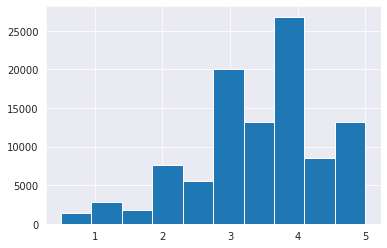

In [10]:
sns.set_style('darkgrid')
notas['nota'].hist()

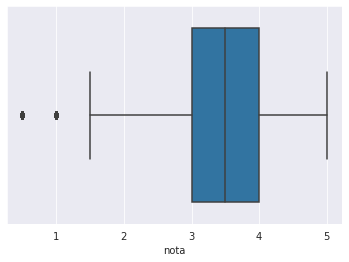

In [11]:
ax = sns.boxplot(data = notas, x='nota', orient = 'h')


# Aula2: Filmes
Trazendo agora os filmes para que a gente possa mesclar!

In [12]:
filmes = pd.read_csv('dados/movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Duas formas de encontrar o mesmo resultado na procura das notas que sejam do filmes toy story.

In [13]:
notas.query('filmeId==1')

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [14]:
notas.loc[notas['filmeId'] == 1]

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


----

In [15]:
notas.query('filmeId==1').nota.mean()

3.9209302325581397

A nota média do filme do Toy Story é maior que a média geral das notas para todos os filmes.

In [16]:
notas.query('filmeId==2').nota.mean()

3.4318181818181817

Esse agora é do filme Jumanji, eu posso fazer isso para cada um dos filmes, no total há mais de 9 mil filmes, demoraria muito tempo, existe formas mais espertas de fazer isso.

In [17]:
medias_por_filme = notas.groupby('filmeId')[['nota']].mean()

In [18]:
medias_por_filme.head()

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


array([[<Axes: title={'center': 'nota'}>]], dtype=object)

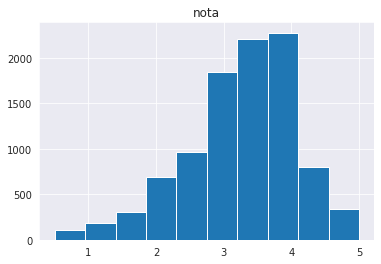

In [19]:
#Para ter uma visualização das medias de notas
medias_por_filme.hist()

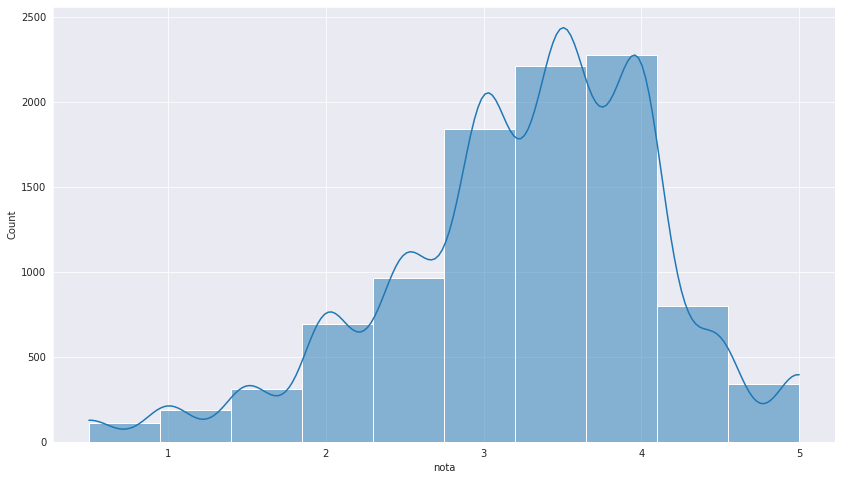

In [20]:
#pelo seaborn
plt.figure(figsize=(14,8))
ax = sns.histplot(data = medias_por_filme['nota'], bins = 10, kde = True)

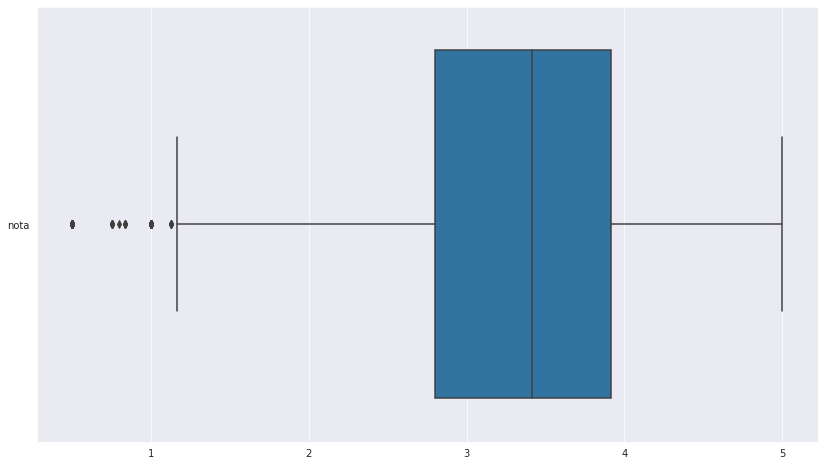

In [21]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(data = medias_por_filme, orient = 'h')

In [22]:
medias_por_filme.describe()

,nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

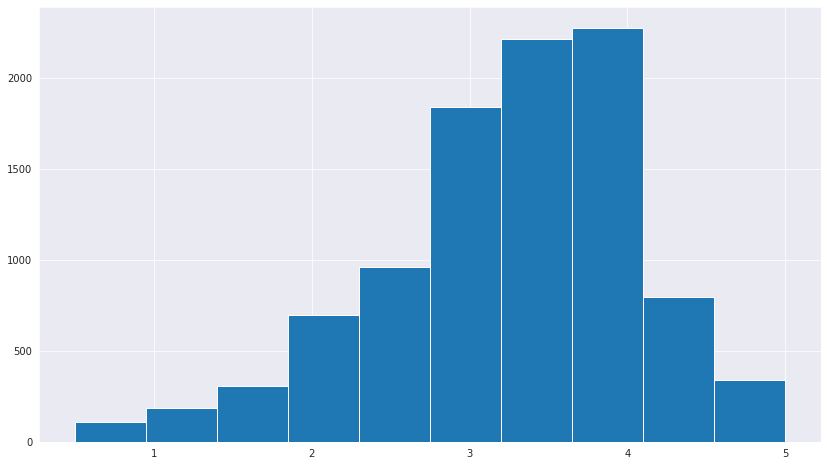

In [23]:
plt.figure(figsize=(14,8))
plt.hist(medias_por_filme)

# Aula 3: Tipo de variáveis

Guilherme adiciona um novo dataset do tmdb de filmes, que ele trabalha em cima de uma ordenação de uma coluna baseada em colunas, trabalhando em cima de categoria ordinal.

In [24]:
tmdb = pd.read_csv('dados/tmdb_5000_movies.csv')

In [25]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# Aula 4: Visualização de Dados

In [26]:
tmdb['original_language'].value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


Muitas coisas aconteceram na célula anterior, primeiro: Fizemos a contagem de quantos registros por tipo de Lingua Original.
Segundo detalhe, somente fazendo a contagem, resultaria numa Series, mas como queremos um DataFrame, utilizamos o método to_frame() para transformar. Mas como queremos deixar o index como coluna, utilizamos tbm o reset_index() criando assim uma segunda coluna do que seria o index.

In [27]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

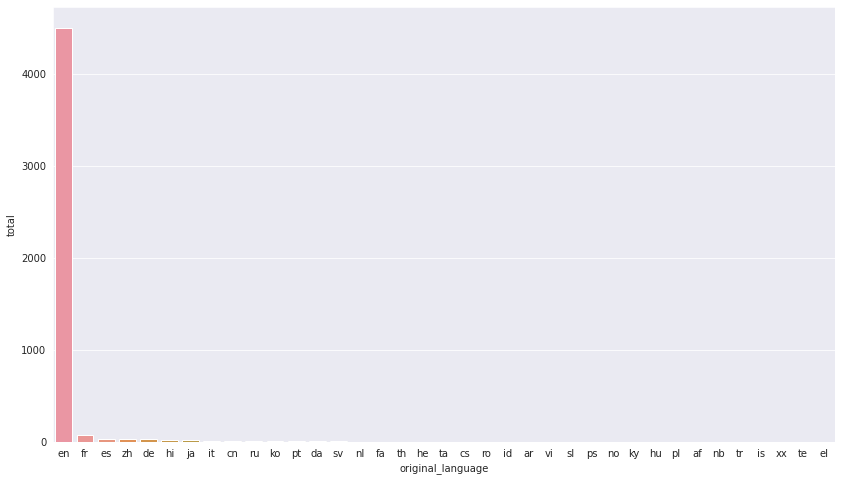

In [28]:
#Gráfico categórico
plt.figure(figsize=(14,8))
ax = sns.barplot(x='original_language',y='total', data=contagem_de_lingua)
ax

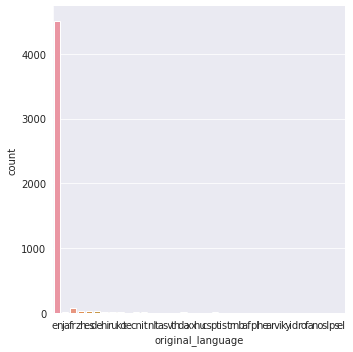

In [29]:
#Outra forma mais rápida e direta, sem precisar fazer um dataframe baseado na contagem
sns.catplot(x="original_language", kind="count", data=tmdb)

([<matplotlib.patches.Wedge at 0x7fc6f6b3ebb0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

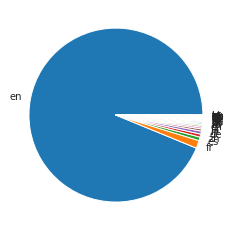

In [30]:
plt.pie(contagem_de_lingua['total'], labels = contagem_de_lingua['original_language'])

Pie plot é horrível, difícil de visualização de muitas categorias.

Uma coisa que pode ser melhor para visualizar, é a comparação entre inglês e o resto das outras linguas, onde a mensagem pode ficar mais clara.

In [31]:
total_por_lingua = tmdb['original_language'].value_counts()

In [32]:
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles

In [33]:
dados = {
    'lingua':['inglês', 'outros'],
    'total':[total_de_ingles, total_do_resto]
}

In [34]:
dados = pd.DataFrame(dados)
dados

,lingua,total
0,inglês,4505
1,outros,298


([<matplotlib.patches.Wedge at 0x7fc6f6a335b0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'inglês'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

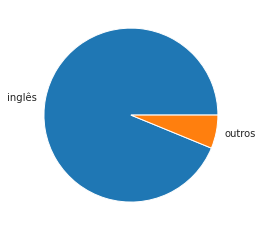

In [35]:
ax = plt.pie(dados['total'], labels=dados['lingua'])
ax

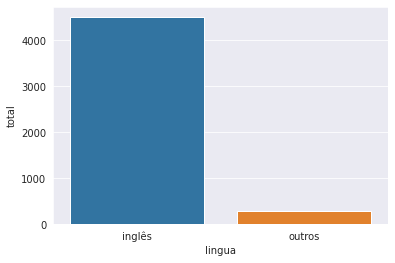

In [36]:
ax = sns.barplot(data=dados, x='lingua', y='total')

Tudo bem. Ficou claro que inglês é predominante sobre o dataset que estamos trabalhando, porém agora vamos olhar para o que não é inglês.

In [37]:
#forma 1
tmdb.loc[tmdb['original_language']!='en'].original_language.value_counts()

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

In [38]:
#forma do guilherme
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

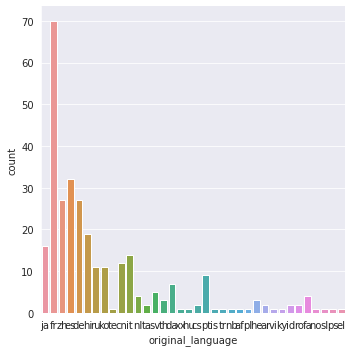

In [39]:
ax=sns.catplot(x = "original_language", 
               data = filmes_sem_lingua_original_em_ingles, 
               kind="count"
            )
ax

# Aula 5: Refinando Visualizações

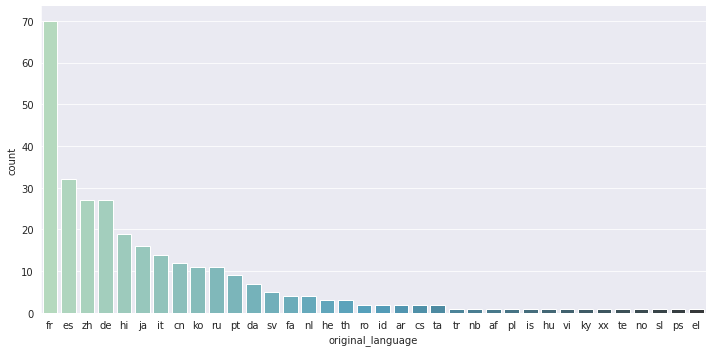

In [40]:
ax=sns.catplot(x = "original_language", 
               data = filmes_sem_lingua_original_em_ingles, 
               kind="count", aspect=2,
               order= total_por_lingua_de_outros_filmes.index,
               palette = 'GnBu_d'
            )
ax

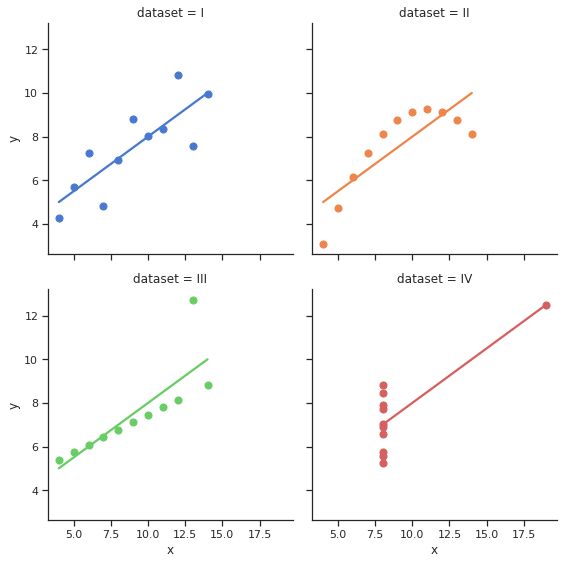

In [41]:
#example
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
# df = sns.load_dataset("anscombe")

# Ao invés de você usar o load_dataset do sns, irei utilizar o método padrao do pandas.
df = pd.read_csv('./dados/anscombe.csv')

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

# Aula 6: Dados e Estatística

In [42]:
filmes.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [43]:
notas_do_toy_story = notas.query('filmeId==1')
notas_do_jumanji = notas.query('filmeId==2')

In [44]:
#Comparando média das notas dos dois filmes.
print('Nota média do filme Toy Story:', notas_do_toy_story['nota'].mean().round(2))
print('Nota média do filme jumanji:', notas_do_jumanji['nota'].mean().round(2))

Nota média do filme Toy Story: 3.92
Nota média do filme jumanji: 3.43


In [45]:
print('Nota mediana do filme Toy Story:', notas_do_toy_story['nota'].median().round(2))
print('Nota mediana do filme jumanji:', notas_do_jumanji['nota'].median().round(2))

Nota mediana do filme Toy Story: 4.0
Nota mediana do filme jumanji: 3.5


Estudo sobre o comportamento das notas. Repare que para os dois casos abaixo, a média é a mesma, porém seus valores são diferentes, o comportamento, o desvio padrão é diferente. Fugindo da tendência central.

In [46]:
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))

filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [47]:
print(filme1.mean(), filme2.mean())
print(np.median(filme1), np.median(filme2))

3.0 3.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

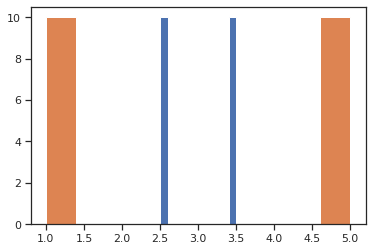

In [48]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc6f65e1970>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc6f65e1eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc6f65e1700>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc6f65f3430>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc6f65f36d0>,
 'means': []}

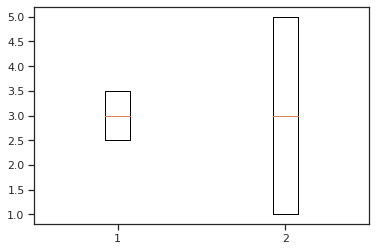

In [49]:
plt.boxplot([filme1,filme2])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc6f657d220>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc6f657d760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc6f656df40>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc6f657dca0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc6f657df40>,
 'means': []}

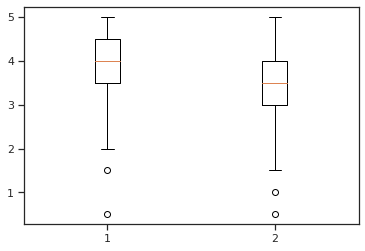

In [50]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

<Axes: xlabel='filmeId', ylabel='nota'>

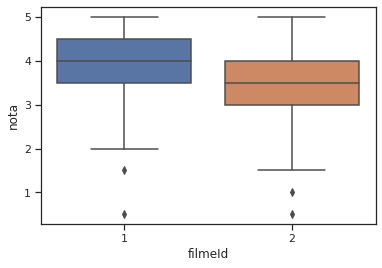

In [51]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in (1,2)"))

<Axes: xlabel='filmeId', ylabel='nota'>

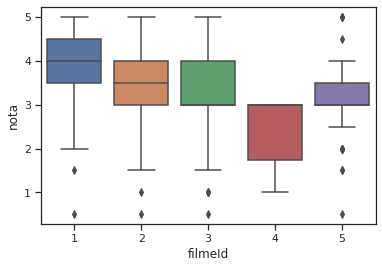

In [52]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in (1,2,3,4,5)"))

In [53]:
print(np.mean(filme1), np.mean(filme2))
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0
